# Question 1

In [2]:
import pandas as pd
import numpy as np

df = pd.read_table('bluegills.txt')
#df.info()
#df.head(100)

# Question 2

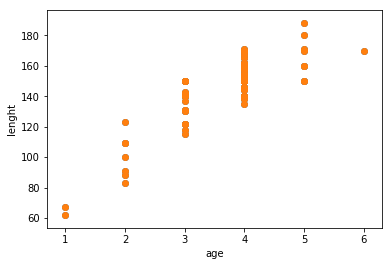

In [10]:
#df.info()
#df.head(10)

import matplotlib.pyplot as plt

x = df['age']
y = df['length']

plt.scatter(x,y)
plt.xlabel('age')
plt.ylabel('lenght')
plt.show()



In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#renvoi nb-1 polynomes de degres 1 à nb
def init_list_poly(X_train,y_train,max_deg):
    list_poly = []
    #initilaise nb polynomes et les place dans list_poly
    for j in range(1,max_deg+1):
        poly = np.polyfit(X_train, y_train, j)
        list_poly.append(poly)
    return list_poly

#renvoi la liste des mse pour une liste de polynomes donnée
def mse(X_train, y_train, X_test, y_test, max_deg):
    #dictionnaire {resultat : polynome}
    mse = []
    x_test = X_test.values
    list_poly = init_list_poly(X_train,y_train,max_deg)
    for poly in list_poly:
        m = 0
        y_pred = []
        #pour chaque polynome dans z on evalue
        for k in range(len(x_test)):
            #calcul la valeur du polynome poly avec les donnees de test et le cast en int
            res = np.polyval(poly,x_test[k]).astype(int)
            y_pred.append(res)
        m = (round(mean_squared_error(y_test.values, y_pred),2))
        mse.append(m)
    return mse

#renvoi le polynome possédant le meileur score,son score et son degre
def min_deg_poly(list_score):
    index_min = np.argmin(list_score)
    score_min = list_score[index_min]
    return 'Le polynomes de degre ' + str(index_min+1) +' minimise le score avec : '+ str(score_min)


# Question 3

In [43]:
#non stable car les decoupe differes
#nb - nombre de decoupage
#renvoi une liste contenant les sommes des scores selon le degres
def decoupage_fixe(nb,max_deg,score):
    list_score = [0]*(max_deg)
    for i in range(nb):
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
        m = score(X_train, y_train, X_test, y_test, max_deg)
        for i in range(len(m)):
            list_score[i] += m[i]
    return list_score

#resultat non stable car les découpages sont tout le temps differents
#decommenter les 2 lignes suivantes pour resultats avec des polynomes de degres jusqu'a 4 et 2 découpages
#for i in range(10):
#     print(min_deg_poly(decoupage_fixe(2,4,mse)))



Le polynomes de degre 4 minimise le score avec : 274.94
Le polynomes de degre 2 minimise le score avec : 330.87
Le polynomes de degre 2 minimise le score avec : 207.25
Le polynomes de degre 2 minimise le score avec : 245.88
Le polynomes de degre 3 minimise le score avec : 264.57
Le polynomes de degre 2 minimise le score avec : 186.75
Le polynomes de degre 3 minimise le score avec : 331.87
Le polynomes de degre 2 minimise le score avec : 299.51
Le polynomes de degre 3 minimise le score avec : 242.32
Le polynomes de degre 2 minimise le score avec : 181.82


# Question 4

In [39]:
from sklearn.cross_validation import KFold

#non stable car les decoupes differes
def cross_validation(n_folds,max_deg,score):
    cv = KFold(n=len(df),n_folds=n_folds,shuffle=True)
    list_score = [0]*(max_deg)
    for training_set, test_set in cv:
        X_train = x[training_set]
        y_train = y[training_set]
        X_test = x[test_set]
        y_test = y[test_set]
        m = score(X_train, y_train, X_test, y_test, max_deg)
        for i in range(len(m)):
            list_score[i] += m[i]
    return np.around(list_score,2)

#resultat pseudo-stable car les découpages sont differents mais plus stable que le decoupage fixe
#decommenter les 2 lignes suivantes pour resultats avec des polynomes de degres jusqu'a 4 et 10 découpages
#for i in range(10):
#     print(min_deg_poly(cross_validation(10,4,mse)))

Le polynomes de degre 2 minimise le score avec : 1212.35
Le polynomes de degre 2 minimise le score avec : 1273.26
Le polynomes de degre 2 minimise le score avec : 1213.51
Le polynomes de degre 2 minimise le score avec : 1247.47
Le polynomes de degre 2 minimise le score avec : 1230.84
Le polynomes de degre 2 minimise le score avec : 1207.34
Le polynomes de degre 2 minimise le score avec : 1219.16
Le polynomes de degre 2 minimise le score avec : 1262.04
Le polynomes de degre 2 minimise le score avec : 1258.87
Le polynomes de degre 2 minimise le score avec : 1214.93


# Question 5

In [44]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

#stable car tout le temps la meme decoupe 
def leave_one_out(max_deg, score):
    #l'implementation avec un dictionnaire pose un probleme avec LeaveOneOut. En effet un dictionnaire ne peut stocker deux clefs identiques.
    # On a alors un dictionnaire de taille 20 alors qu'on devrait en avoir un de taille 78(taille de df)
    list_score = [0]*(max_deg)
    for train, test in loo.split(df):
        X_train = x[train]
        y_train = y[train]
        X_test = x[test]
        y_test = y[test]
        m = score(X_train, y_train, X_test, y_test, max_deg)
        for i in range(len(m)):
            list_score[i] += m[i]
    return list_score

#resultat tout le temps stable car les decoupes sont toutes les memes
#decommenter les 2 lignes suivantes pour resultats avec des polynomes de degres jusqu'a 4
#for i in range(10):
#       print(min_deg_poly(leave_one_out(4,mse)))

Le polynomes de degre 2 minimise le score avec : 9432.0
Le polynomes de degre 2 minimise le score avec : 9432.0
Le polynomes de degre 2 minimise le score avec : 9432.0
Le polynomes de degre 2 minimise le score avec : 9432.0
Le polynomes de degre 2 minimise le score avec : 9432.0
Le polynomes de degre 2 minimise le score avec : 9432.0
Le polynomes de degre 2 minimise le score avec : 9432.0
Le polynomes de degre 2 minimise le score avec : 9432.0
Le polynomes de degre 2 minimise le score avec : 9432.0
Le polynomes de degre 2 minimise le score avec : 9432.0


# Question 6

In [46]:
#AIC citerion
#renvoi la liste des aic pour une liste de polynomes donnée
def aic(X_train, y_train, X_test, y_test, max_deg):
    #dictionnaire {resultat : polynome}
    aic = []
    x_test = X_test.values
    k= max_deg
    n = len(x_test)
    list_poly = init_list_poly(X_train,y_train,max_deg)
    for poly in list_poly:
        m = 0
        y_pred = []
        #pour chaque polynome dans z on evalue
        for k in range(n):
            #calcul la valeur du polynome poly avec les donnees de test et le cast en int
            res = np.polyval(poly,x_test[k]).astype(int)
            y_pred.append(res)
        m = mean_squared_error(y_test.values, y_pred)
        a = round(k + 2 + n/2 * np.log(2*np.pi * m),2)
        aic.append(a)
    return aic

#aic = k + 2 +n/2+ n/2 * np.log(2 * np.pi * mse)
#aic += n/2. * np.log(2 * np.pi * rss/n)
#for i in range(10):
#    print('Decoupage fixe : ' + min_deg_poly(decoupage_fixe(4,4,aic)))
#    print('Cross validation : ' + min_deg_poly(cross_validation(10,4,aic)))
#    # Probleme de log(0)
#    # En effet on peut avoir des cas ou mse = 0 car on prend pratiquement toute les données pour l'apprentissage et on a donc un modéle qui colle au donnée et donc sans erreur lors du seul test si la donnée est redondante
#    print('Leave one out : ' + min_deg_poly(leave_one_out(4,aic)))

Decoupage fixe : Le polynomes de degre 2 minimise le score avec : 278.8
Cross validation : Le polynomes de degre 2 minimise le score avec : 336.76


c:\python27\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log
c:\python27\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


Leave one out : Le polynomes de degre 2 minimise le score avec : nan
Decoupage fixe : Le polynomes de degre 2 minimise le score avec : 283.15
Cross validation : Le polynomes de degre 2 minimise le score avec : 338.9
Leave one out : Le polynomes de degre 2 minimise le score avec : nan
Decoupage fixe : Le polynomes de degre 2 minimise le score avec : 275.49
Cross validation : Le polynomes de degre 2 minimise le score avec : 340.36
Leave one out : Le polynomes de degre 2 minimise le score avec : nan
Decoupage fixe : Le polynomes de degre 4 minimise le score avec : 276.14
Cross validation : Le polynomes de degre 2 minimise le score avec : 338.95
Leave one out : Le polynomes de degre 2 minimise le score avec : nan
Decoupage fixe : Le polynomes de degre 3 minimise le score avec : 282.26
Cross validation : Le polynomes de degre 2 minimise le score avec : 338.24
Leave one out : Le polynomes de degre 2 minimise le score avec : nan
Decoupage fixe : Le polynomes de degre 2 minimise le score avec 

# Question 7

In [136]:
#BIC citerion
#renvoi la liste des aic pour une liste de polynomes donnée
def bic(X_train, y_train, X_test, y_test, max_deg):
    #dictionnaire {resultat : polynome}
    bic = []
    x_test = X_test.values
    k= max_deg
    n = len(x_test)
    list_poly = init_list_poly(X_train,y_train,max_deg)
    for poly in list_poly:
        m = 0
        y_pred = []
        #pour chaque polynome dans z on evalue
        for k in range(n):
            #calcul la valeur du polynome poly avec les donnees de test et le cast en int
            res = np.polyval(poly,x_test[k]).astype(int)
            y_pred.append(res)
        m = mean_squared_error(y_test.values, y_pred)
        b = round(2*k*np.log(n) - 2*np.log(m),2)
        bic.append(b)
        #print(bic)
    return bic
#for i in range(10):
#    print('Decoupage fixe : ' + min_deg_poly(decoupage_fixe(4,4,bic)))
#    print('Cross validation : ' + min_deg_poly(cross_validation(10,4,bic)))
    # Meme Probleme de log(0) qu'avec AIC
    # En effet on peut avoir des cas ou mse = 0 car on prend pratiquement toute les données pour l'apprentissage et on a donc un modéle qui colle au donnée et donc sans erreur lors du seul test si la donnée est redondante
#    print('Leave one out : ' + min_deg_poly(leave_one_out(4,bic)))

Decoupage fixe : Le polynomes de degre 1 minimise le score 291.04
Cross validation : Le polynomes de degre 1 minimise le score 179.91


c:\python27\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


Leave one out : Le polynomes de degre 1 minimise le score -610.15
